# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

# 1.0. Exploratory Data Analysis

In [2]:
#Dataset upload from URL
url = 'https://raw.githubusercontent.com/lucasquemelli/House_Rocket/main/kc_house_data.csv'
data = pd.read_csv(url)

## 1.1. Data Description

In [3]:
#Visualization of the first 05 rows
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#Number of rows and columns of the dataset
print("Number of rows: {}\nNumber of columns: {}".format(data.shape[0],data.shape[1]))

Number of rows: 21613
Number of columns: 21


In [5]:
#Number of attributes: this is without "id" and "date"
num_attributes = len(data.columns) - 2
print("The number of attribute is:", num_attributes)

The number of attribute is: 19


In [6]:
#Properties attributes
attributes = data.drop(['id','date'], axis=1)
attributes.columns.tolist()

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [7]:
#Variable types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
#Descriptive analysis
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.00,4580301520.86,2876565571.31,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00
price,21613.00,540088.14,367127.20,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


Notice that there is no statistical meaning when applying descriptive analysis for "id", "zipcode", "lat" and "long". 

In [9]:
#Displaying unique values for the number of bedrooms, bathrooms, floors, waterfront, view, condition and grade
print("Unique values for bedrooms:", np.sort(data['bedrooms'].unique())) 
print("\nUnique values for bathrooms:", np.sort(data['bathrooms'].unique()))
print("\nUnique values for floors:", np.sort(data['floors'].unique()))
print("\nUnique values for waterfront:", np.sort(data['waterfront'].unique()))
print("\nUnique values for view:", np.sort(data['view'].unique()))
print("\nUnique values for condition:", np.sort(data['condition'].unique()))
print("\nUnique values for grade:", np.sort(data['grade'].unique()))

Unique values for bedrooms: [ 0  1  2  3  4  5  6  7  8  9 10 11 33]

Unique values for bathrooms: [0.   0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
 3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.5
 7.75 8.  ]

Unique values for floors: [1.  1.5 2.  2.5 3.  3.5]

Unique values for waterfront: [0 1]

Unique values for view: [0 1 2 3 4]

Unique values for condition: [1 2 3 4 5]

Unique values for grade: [ 1  3  4  5  6  7  8  9 10 11 12 13]


While there are properties with 33 bedrooms, also are there with 0. The same happens with the number of bathrooms.              This would properly be classified as inconsistences, yet I choose to classify into different types of properties in            this analysis. 

The other attributes contain a large number of unique values, such as "id" - as it may be seen below. Thus, they were not considered in this analysis. 

In [10]:
print("Number of unique values for 'id':", data['id'].nunique())

Number of unique values for 'id': 21436


While the number of rows is 21613, the number of unique "id" is 21436. It means there are only 21436 properties. 

## 1.2. Data Cleaning

In [11]:
#Checking for missing values
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
#Checking for duplicates in identification number (id)
ids = data['id']
data[ids.isin(ids[ids.duplicated()])].sort_values('id')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,20150422T000000,300000.00,6,3.00,2400,9373,2.00,0,0,...,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
2496,1000102,20140916T000000,280000.00,6,3.00,2400,9373,2.00,0,0,...,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
16814,7200179,20141016T000000,150000.00,2,1.00,840,12750,1.00,0,0,...,6,840,0,1925,0,98055,47.48,-122.21,1480,6969
16815,7200179,20150424T000000,175000.00,2,1.00,840,12750,1.00,0,0,...,6,840,0,1925,0,98055,47.48,-122.21,1480,6969
11434,109200390,20141020T000000,250000.00,3,1.75,1480,3900,1.00,0,0,...,7,1480,0,1980,0,98023,47.30,-122.37,1830,6956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,9828200460,20140627T000000,260000.00,2,1.00,700,4800,1.00,0,0,...,7,700,0,1922,0,98122,47.61,-122.30,1440,4800
15200,9834200305,20150210T000000,615000.00,3,1.00,1790,3876,1.50,0,0,...,7,1090,700,1904,0,98144,47.58,-122.29,1360,4080
15199,9834200305,20140716T000000,350000.00,3,1.00,1790,3876,1.50,0,0,...,7,1090,700,1904,0,98144,47.58,-122.29,1360,4080
1085,9834200885,20140717T000000,360000.00,4,2.50,2080,4080,1.00,0,0,...,7,1040,1040,1962,0,98144,47.57,-122.29,1340,4080


Duplicates (353) in this dataset are meant to be properties which were sold twice or more between 2014 and 2015. These properties were sold on different dates and at different prices. It means the price changes with time. 

It is important to mention that the number of duplicates is different from the number of ids that are duplicates. Notice that the same id appears twice or more. Thus, the number of ids that are duplicate is: total number of rows - number of unique ids = 177.

## 1.3. Data Conversion

In [13]:
data['date'] =  pd.to_datetime(data['date'])

## 1.4. Outliers 

We may have a look at the outliers in the dataset using the boxplot chart. However, as it may be seen below, this is an univariate analysis. As the price is influenced by a lot of features in the dataset, we must remove outliers using multivariate analysis. 

<AxesSubplot:ylabel='price'>

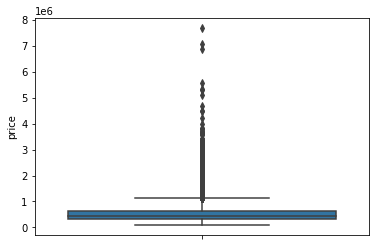

In [14]:
sns.boxplot(y='price',data=data)

To remove outliers using multivariate analysis, we are going to use three methods: **visual method**, **Z-score method** and **interquartile range method**. Then, we are going to work *separately* with each resulting dataset and make conclusions.  

Firstly, in order to use the methods **Z-score** and **interquartile range**, we have to set the column 'date' as integer as follows:

In [15]:
#Setting the feature 'date' as integer (type 1)
df2 = data
df2['date'] = df2['date'].astype(np.int64)

C:\Users\USURIO~3\AppData\Local\Temp/ipykernel_15388/3111365596.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df2['date'] = df2['date'].astype(np.int64)


In [16]:
#Setting the feature 'date' as integer (type 2)
df3 = data
df3['date'] = df3['date'].view(np.int64)

The datasets df2 and df3 are the same, only treated with different "set as integer" functions.

### 1.4.1. Visual method

In [17]:
#Properties with the highest prices
data.sort_values('price', ascending=False).head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,1413158400000000000,7700000.00,6,8.00,12050,27600,2.50,0,3,...,13,8570,3480,1910,1987,98102,47.63,-122.32,3940,8800
3914,9808700762,1402444800000000000,7062500.00,5,4.50,10040,37325,2.00,1,2,...,11,7680,2360,1940,2001,98004,47.65,-122.21,3930,25449
9254,9208900037,1411084800000000000,6885000.00,6,7.75,9890,31374,2.00,0,4,...,13,8860,1030,2001,0,98039,47.63,-122.24,4540,42730
4411,2470100110,1407110400000000000,5570000.00,5,5.75,9200,35069,2.00,0,0,...,13,6200,3000,2001,0,98039,47.63,-122.23,3560,24345
1448,8907500070,1428883200000000000,5350000.00,5,5.00,8000,23985,2.00,0,4,...,12,6720,1280,2009,0,98004,47.62,-122.22,4600,21750
1315,7558700030,1428883200000000000,5300000.00,6,6.00,7390,24829,2.00,1,4,...,12,5000,2390,1991,0,98040,47.56,-122.21,4320,24619
1164,1247600105,1413763200000000000,5110800.00,5,5.25,8010,45517,2.00,1,4,...,12,5990,2020,1999,0,98033,47.68,-122.21,3430,26788
8092,1924059029,1402963200000000000,4668000.00,5,6.75,9640,13068,1.00,1,4,...,12,4820,4820,1983,2009,98040,47.56,-122.21,3270,10454
2626,7738500731,1408060800000000000,4500000.00,5,5.50,6640,40014,2.00,1,4,...,12,6350,290,2004,0,98155,47.75,-122.28,3030,23408
8638,3835500195,1403049600000000000,4489000.00,4,3.00,6430,27517,2.00,0,0,...,12,6430,0,2001,0,98004,47.62,-122.22,3720,14592


The properties with the highest prices have such values due to their features. No anomalies were found to be considered as outliers. 

In [18]:
#Properties with 10 or more than 10 bedrooms
data[data['bedrooms'] >= 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,1408579200000000000,520000.00,11,3.00,3000,4960,2.00,0,0,...,7,2400,600,1918,1999,98106,47.56,-122.36,1420,4960
13314,627300145,1407974400000000000,1148000.00,10,5.25,4590,10920,1.00,0,2,...,9,2500,2090,2008,0,98004,47.59,-122.11,2730,10400
15161,5566100170,1414540800000000000,650000.00,10,2.00,3610,11914,2.00,0,0,...,7,3010,600,1958,0,98006,47.57,-122.17,2040,11914
15870,2402100895,1403654400000000000,640000.00,33,1.75,1620,6000,1.00,0,0,...,7,1040,580,1947,0,98103,47.69,-122.33,1330,4700
19254,8812401450,1419811200000000000,660000.00,10,3.00,2920,3745,2.00,0,0,...,7,1860,1060,1913,0,98105,47.66,-122.32,1810,3745


The prices of the properties above are all feasible with their features. Although perhaps the 11-bedrooms and the 33-bedrooms properties prices may be seen as anomalies, they will not be treated as outliers due to their year built (yr_built) and total area (sqft_lot). Some of their features may be atypical because of the time they were built and localization.  

In [19]:
#Properties with no bedrooms
data[data['bedrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,1402531200000000000,1095000.00,0,0.00,3064,4764,3.50,0,2,...,7,3064,0,1990,0,98102,47.64,-122.32,2360,4000
3119,3918400017,1423094400000000000,380000.00,0,0.00,1470,979,3.00,0,2,...,8,1470,0,2006,0,98133,47.71,-122.36,1470,1399
3467,1453602309,1407196800000000000,288000.00,0,1.50,1430,1650,3.00,0,0,...,7,1430,0,1999,0,98125,47.72,-122.29,1430,1650
4868,6896300380,1412208000000000000,228000.00,0,1.00,390,5900,1.00,0,0,...,4,390,0,1953,0,98118,47.53,-122.26,2170,6000
6994,2954400190,1403568000000000000,1295650.00,0,0.00,4810,28008,2.00,0,0,...,12,4810,0,1990,0,98053,47.66,-122.07,4740,35061
8477,2569500210,1416182400000000000,339950.00,0,2.50,2290,8319,2.00,0,0,...,8,2290,0,1985,0,98042,47.35,-122.15,2500,8751
8484,2310060040,1411603200000000000,240000.00,0,2.50,1810,5669,2.00,0,0,...,7,1810,0,2003,0,98038,47.35,-122.05,1810,5685
9773,3374500520,1430265600000000000,355000.00,0,0.00,2460,8049,2.00,0,0,...,8,2460,0,1990,0,98031,47.41,-122.17,2520,8050
9854,7849202190,1419292800000000000,235000.00,0,0.00,1470,4800,2.00,0,0,...,7,1470,0,1996,0,98065,47.53,-121.83,1060,7200
12653,7849202299,1424217600000000000,320000.00,0,2.50,1490,7111,2.00,0,0,...,7,1490,0,1999,0,98065,47.53,-121.83,1500,4675


Although some properties have no bedrooms, they may be treated as studios and not as apartments or even houses. They are considered like this and not as outliers due to requests from the House Rocket's CEO. 

In [21]:
#Properties with 6 or more than 6 bathrooms
data[data['bathrooms'] >= 6]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1315,7558700030,1428883200000000000,5300000.00,6,6.00,7390,24829,2.00,1,4,...,12,5000,2390,1991,0,98040,47.56,-122.21,4320,24619
4024,9175600025,1412640000000000000,800000.00,7,6.75,7480,41664,2.00,0,2,...,11,5080,2400,1953,0,98166,47.46,-122.37,2810,33190
4035,685000115,1412640000000000000,2150000.00,8,6.00,4340,9415,2.00,0,0,...,8,4340,0,1967,0,98004,47.63,-122.20,2050,9100
7252,6762700020,1413158400000000000,7700000.00,6,8.00,12050,27600,2.50,0,3,...,13,8570,3480,1910,1987,98102,47.63,-122.32,3940,8800
8092,1924059029,1402963200000000000,4668000.00,5,6.75,9640,13068,1.00,1,4,...,12,4820,4820,1983,2009,98040,47.56,-122.21,3270,10454
8546,424049043,1407715200000000000,450000.00,9,7.50,4050,6504,2.00,0,0,...,7,4050,0,1996,0,98144,47.59,-122.30,1448,3866
9254,9208900037,1411084800000000000,6885000.00,6,7.75,9890,31374,2.00,0,4,...,13,8860,1030,2001,0,98039,47.63,-122.24,4540,42730
12370,6065300370,1430870400000000000,4208000.00,5,6.00,7440,21540,2.00,0,0,...,12,5550,1890,2003,0,98006,47.57,-122.19,4740,19329
12777,1225069038,1399248000000000000,2280000.00,7,8.00,13540,307752,3.00,0,4,...,12,9410,4130,1999,0,98053,47.67,-121.99,4850,217800
14556,2303900035,1402444800000000000,2888000.00,5,6.25,8670,64033,2.00,0,4,...,13,6120,2550,1965,2003,98177,47.73,-122.37,4140,81021


The prices of the properties above are all consistent with their features. Thus, they will not be treated as outliers.

In [22]:
#Properties with no bathrooms
data[data['bathrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,1402531200000000000,1095000.00,0,0.00,3064,4764,3.50,0,2,...,7,3064,0,1990,0,98102,47.64,-122.32,2360,4000
1149,3421079032,1424131200000000000,75000.00,1,0.00,670,43377,1.00,0,0,...,3,670,0,1966,0,98022,47.26,-121.91,1160,42882
3119,3918400017,1423094400000000000,380000.00,0,0.00,1470,979,3.00,0,2,...,8,1470,0,2006,0,98133,47.71,-122.36,1470,1399
5832,5702500050,1415059200000000000,280000.00,1,0.00,600,24501,1.00,0,0,...,3,600,0,1950,0,98045,47.53,-121.75,990,22549
6994,2954400190,1403568000000000000,1295650.00,0,0.00,4810,28008,2.00,0,0,...,12,4810,0,1990,0,98053,47.66,-122.07,4740,35061
9773,3374500520,1430265600000000000,355000.00,0,0.00,2460,8049,2.00,0,0,...,8,2460,0,1990,0,98031,47.41,-122.17,2520,8050
9854,7849202190,1419292800000000000,235000.00,0,0.00,1470,4800,2.00,0,0,...,7,1470,0,1996,0,98065,47.53,-121.83,1060,7200
10481,203100435,1410998400000000000,484000.00,1,0.00,690,23244,1.00,0,0,...,7,690,0,1948,0,98053,47.64,-121.95,1690,19290
14423,9543000205,1428883200000000000,139950.00,0,0.00,844,4269,1.00,0,0,...,7,844,0,1913,0,98001,47.28,-122.25,1380,9600
19452,3980300371,1411689600000000000,142000.00,0,0.00,290,20875,1.00,0,0,...,1,290,0,1963,0,98024,47.53,-121.89,1620,22850


Again, properties with no bathrooms will be treated as studios. It happens because some buildings may not even have been finished. Thus, they must not be treated as a typo or outliers because they are not (still) a house/apartment, but as a property. 

### 1.4.2. Z-score method

In [10]:
z1 = np.abs(stats.zscore(df1))
print(z1)

             id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      0.886146  0.866717  0.398737   1.447464     0.979835  0.228321   
1      0.637511  0.005688  0.398737   0.175607     0.533634  0.189885   
2      0.365444  0.980849  1.473959   1.447464     1.426254  0.123298   
3      0.727656  0.174090  0.676485   1.149449     0.130550  0.244014   
4      0.912881  0.081958  0.398737   0.149007     0.435422  0.169653   
...         ...       ...       ...        ...          ...       ...   
21608  1.500888  0.490545  0.398737   0.500221     0.598746  0.337424   
21609  0.702159  0.381588  0.676485   0.500221     0.250539  0.224386   
21610  1.062751  0.375865  1.473959   1.772078     1.154047  0.332137   
21611  1.491046  0.381588  0.398737   0.500221     0.522528  0.307076   
21612  1.062751  0.585882  1.473959   1.772078     1.154047  0.338752   

         floors  waterfront      view  condition     grade  sqft_above  \
0      0.915427    0.087173  0.305759   0.629187 

In [12]:
z2 = np.abs(stats.zscore(df2))
print(z2)

             id      date     price  bedrooms  bathrooms  sqft_living  \
0      0.886146  0.143244  0.866717  0.398737   1.447464     0.979835   
1      0.637511  0.360978  0.005688  0.398737   0.175607     0.533634   
2      0.365444  1.050966  0.980849  1.473959   1.447464     1.426254   
3      0.727656  0.360978  0.174090  0.676485   1.149449     0.130550   
4      0.912881  0.989044  0.081958  0.398737   0.149007     0.435422   
...         ...       ...       ...       ...        ...          ...   
21608  1.500888  1.425915  0.490545  0.398737   0.500221     0.598746   
21609  0.702159  1.033274  0.381588  0.676485   0.500221     0.250539   
21610  1.062751  1.133996  0.375865  1.473959   1.772078     1.154047   
21611  1.491046  0.697126  0.381588  0.398737   0.500221     0.522528   
21612  1.062751  0.125552  0.585882  1.473959   1.772078     1.154047   

       sqft_lot    floors  waterfront      view  ...     grade  sqft_above  \
0      0.228321  0.915427    0.087173  0.3057

In [13]:
z3 = np.abs(stats.zscore(df3))
print(z3)

             id      date     price  bedrooms  bathrooms  sqft_living  \
0      0.886146  0.143244  0.866717  0.398737   1.447464     0.979835   
1      0.637511  0.360978  0.005688  0.398737   0.175607     0.533634   
2      0.365444  1.050966  0.980849  1.473959   1.447464     1.426254   
3      0.727656  0.360978  0.174090  0.676485   1.149449     0.130550   
4      0.912881  0.989044  0.081958  0.398737   0.149007     0.435422   
...         ...       ...       ...       ...        ...          ...   
21608  1.500888  1.425915  0.490545  0.398737   0.500221     0.598746   
21609  0.702159  1.033274  0.381588  0.676485   0.500221     0.250539   
21610  1.062751  1.133996  0.375865  1.473959   1.772078     1.154047   
21611  1.491046  0.697126  0.381588  0.398737   0.500221     0.522528   
21612  1.062751  0.125552  0.585882  1.473959   1.772078     1.154047   

       sqft_lot    floors  waterfront      view  ...     grade  sqft_above  \
0      0.228321  0.915427    0.087173  0.3057

In [14]:
threshold = 3
print(np.where(z1 > 3))

(array([    1,     5,     5, ..., 21590, 21590, 21600], dtype=int64), array([14,  3,  4, ..., 12, 18, 11], dtype=int64))


In [15]:
threshold = 3
print(np.where(z2 > 3))

(array([    1,     5,     5, ..., 21590, 21590, 21600], dtype=int64), array([15,  4,  5, ..., 13, 19, 12], dtype=int64))


In [16]:
threshold = 3
print(np.where(z3 > 3))

(array([    1,     5,     5, ..., 21590, 21590, 21600], dtype=int64), array([15,  4,  5, ..., 13, 19, 12], dtype=int64))


In [17]:
print(z1.iloc[1][14])

4.746677600764257


In [18]:
print(z2.iloc[1][15])

4.746677600764257


In [19]:
print(z3.iloc[1][15])

4.746677600764257


In [21]:
df1 = df1[(z1 < 3).all(axis=1)]

In [22]:
df2 = df2[(z2 < 3).all(axis=1)]

In [23]:
df3 = df3[(z3 < 3).all(axis=1)]

In [24]:
print("Number of rows:", df1.shape[0])
print("Number of columns:", df1.shape[1])

Number of rows: 18702
Number of columns: 20


In [25]:
print("Number of rows:", df2.shape[0])
print("Number of columns:", df2.shape[1])

Number of rows: 18702
Number of columns: 21


In [26]:
print("Number of rows:", df3.shape[0])
print("Number of columns:", df3.shape[1])

Number of rows: 18702
Number of columns: 21


### 1.4.3. Interquartile range (IQR) method

In [30]:
Q11 = df1.quantile(0.25)
Q32 = df1.quantile(0.75)
IQR = Q32 - Q11
print(IQR)

id               5.185851e+09
price            3.230500e+05
bedrooms         1.000000e+00
bathrooms        7.500000e-01
sqft_living      1.123000e+03
sqft_lot         5.648000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        1.000000e+00
grade            1.000000e+00
sqft_above       1.020000e+03
sqft_basement    5.600000e+02
yr_built         4.600000e+01
yr_renovated     0.000000e+00
zipcode          8.500000e+01
lat              2.070000e-01
long             2.030000e-01
sqft_living15    8.700000e+02
sqft_lot15       4.983000e+03
dtype: float64


In [31]:
Q13 = df2.quantile(0.25)
Q34 = df2.quantile(0.75)
IQR = Q34 - Q13
print(IQR)

id               5.185851e+09
date             1.814400e+16
price            3.230500e+05
bedrooms         1.000000e+00
bathrooms        7.500000e-01
sqft_living      1.123000e+03
sqft_lot         5.648000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        1.000000e+00
grade            1.000000e+00
sqft_above       1.020000e+03
sqft_basement    5.600000e+02
yr_built         4.600000e+01
yr_renovated     0.000000e+00
zipcode          8.500000e+01
lat              2.070000e-01
long             2.030000e-01
sqft_living15    8.700000e+02
sqft_lot15       4.983000e+03
dtype: float64


In [32]:
Q15 = df3.quantile(0.25)
Q36 = df3.quantile(0.75)
IQR = Q36 - Q15
print(IQR)

id               5.185851e+09
date             1.814400e+16
price            3.230500e+05
bedrooms         1.000000e+00
bathrooms        7.500000e-01
sqft_living      1.123000e+03
sqft_lot         5.648000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        1.000000e+00
grade            1.000000e+00
sqft_above       1.020000e+03
sqft_basement    5.600000e+02
yr_built         4.600000e+01
yr_renovated     0.000000e+00
zipcode          8.500000e+01
lat              2.070000e-01
long             2.030000e-01
sqft_living15    8.700000e+02
sqft_lot15       4.983000e+03
dtype: float64


In [33]:
print((df1 < (Q11 - 1.5 * IQR)) | (df1 > (Q32 + 1.5 * IQR)))

       bathrooms  bedrooms  condition   date  floors  grade     id    lat  \
0          False     False      False  False   False  False  False  False   
1          False     False      False  False   False  False  False  False   
2          False     False      False  False   False  False  False  False   
3          False     False      False  False   False  False  False  False   
4          False     False      False  False   False  False  False  False   
...          ...       ...        ...    ...     ...    ...    ...    ...   
21608      False     False      False  False   False  False  False  False   
21609      False     False      False  False   False  False  False  False   
21610      False     False      False  False   False  False  False  False   
21611      False     False      False  False   False  False  False  False   
21612      False     False      False  False   False  False  False  False   

        long  price  ...  sqft_basement  sqft_living  sqft_living15  sqft_l

C:\Users\USURIO~3\AppData\Local\Temp/ipykernel_14096/2544815567.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print((df1 < (Q11 - 1.5 * IQR)) | (df1 > (Q32 + 1.5 * IQR)))


In [34]:
print((df2 < (Q13 - 1.5 * IQR)) | (df2 > (Q34 + 1.5 * IQR)))

          id   date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      False  False  False     False      False        False     False   
1      False  False  False     False      False        False     False   
2      False  False  False     False      False        False     False   
3      False  False  False     False      False        False     False   
4      False  False  False     False      False        False     False   
...      ...    ...    ...       ...        ...          ...       ...   
21608  False  False  False     False      False        False     False   
21609  False  False  False     False      False        False     False   
21610  False  False  False     False      False        False     False   
21611  False  False  False     False      False        False     False   
21612  False  False  False     False      False        False     False   

       floors  waterfront   view  ...  grade  sqft_above  sqft_basement  \
0       False       False  False  ..

In [35]:
df1 = df1[~((df1 < (Q11 - 1.5 * IQR)) | (df1 > (Q32 + 1.5 * IQR))).any(axis=1)]
df1.shape

C:\Users\USURIO~3\AppData\Local\Temp/ipykernel_14096/2448089164.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df1[~((df1 < (Q11 - 1.5 * IQR)) | (df1 > (Q32 + 1.5 * IQR))).any(axis=1)]


(14934, 20)

In [36]:
df2 = df2[~((df2 < (Q13 - 1.5 * IQR)) | (df2 > (Q34 + 1.5 * IQR))).any(axis=1)]
df2.shape

(14934, 21)

<AxesSubplot:ylabel='price'>

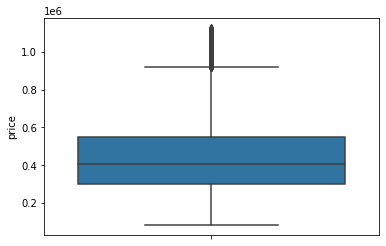

In [37]:
sns.boxplot(y='price',data=df2)